# Data Project - Stock Market Analysis

In this project, we explore financial data from the stock market, particularly technology stocks. Financial data is an example of time series data, which is one of the most prevalent data types characterized by a series of data points indexed in time order. We will get the stock data from the Yahoo finance website, which is a rich resource for financial market data. By analyzing these data, we aim to answer the following questions:

    1.) What was the average change in prices of the stock over time?
    2.) What was the correlation between different stocks?
    3.) How much value do we put at risk by investing in a particular stock?
    4.) How can we predict the future stock behavior? (For example, predicting the closing price stock price of APPLE inc.)

# 1. Getting the Data

In this section, we load the required packages and download the financial data.  We will get our stock data from the Yahoo Finance website, which is a rich resource of financial market data and tools to assist investment. We are using the python package [yfinance library](https://aroussi.com/post/python-yahoo-finance) to obtain the market data from Yahoo.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-07  153.699997  154.029999  151.130005  151.600006  150.795105   
2023-03-08  152.809998  153.470001  151.830002  152.869995  152.058350   
2023-03-09  153.559998  154.539993  150.229996  150.589996  149.790466   
2023-03-10  150.210007  150.940002  147.610001  148.500000  147.711563   
2023-03-13  147.809998  153.139999  147.699997  150.470001  149.671097   
2023-03-14  151.279999  153.399994  150.100006  152.589996  151.779846   
2023-03-15  151.190002  153.250000  149.919998  152.990005  152.177734   
2023-03-16  152.160004  156.460007  151.639999  155.850006  155.022537   
2023-03-17  156.080002  156.740005  154.279999  155.000000  154.177048   
2023-03-20  155.070007  157.820007  154.149994  157.399994  156.564285   

              Volume company_name  
Date                               
2023-03-07  56182000        APPLE  
2023-03-08  47204800        APPLE  
2023-03-09  53833600        APPLE  
2023-03-10  68572400        APPLE  
2023-03-13  84457100        APPLE  
2023-03-14  73695900        APPLE  
2023-03-15  77167900        APPLE  
2023-03-16  76161100        APPLE  
2023-03-17  98944600        APPLE  
2023-03-20  73641400        APPLE

Here, we have consolidated all the datasets into a single dataframe named 'df' which comprises 8 columns. The data covers a one-year period. The 'open' column records the opening price of a stock, while the 'close' column stores the closing price. The 'high' and 'low' columns represent the highest and lowest prices of the stock within a day. Additionally, the 'volume' column denotes the number of stocks that change ownership in a day.

In [3]:
# General info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2023-03-07 to 2024-03-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1012 non-null   float64
 1   High          1012 non-null   float64
 2   Low           1012 non-null   float64
 3   Close         1012 non-null   float64
 4   Adj Close     1012 non-null   float64
 5   Volume        1012 non-null   int64  
 6   company_name  1012 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.2+ KB


We see that there are no missing value in the data, and the data types are in the correct format.

## Data visualization

The closing price, which is the final price at which a stock is exchanged during the typical trading day, serves as the standard measure employed by investors for monitoring its performance across time.

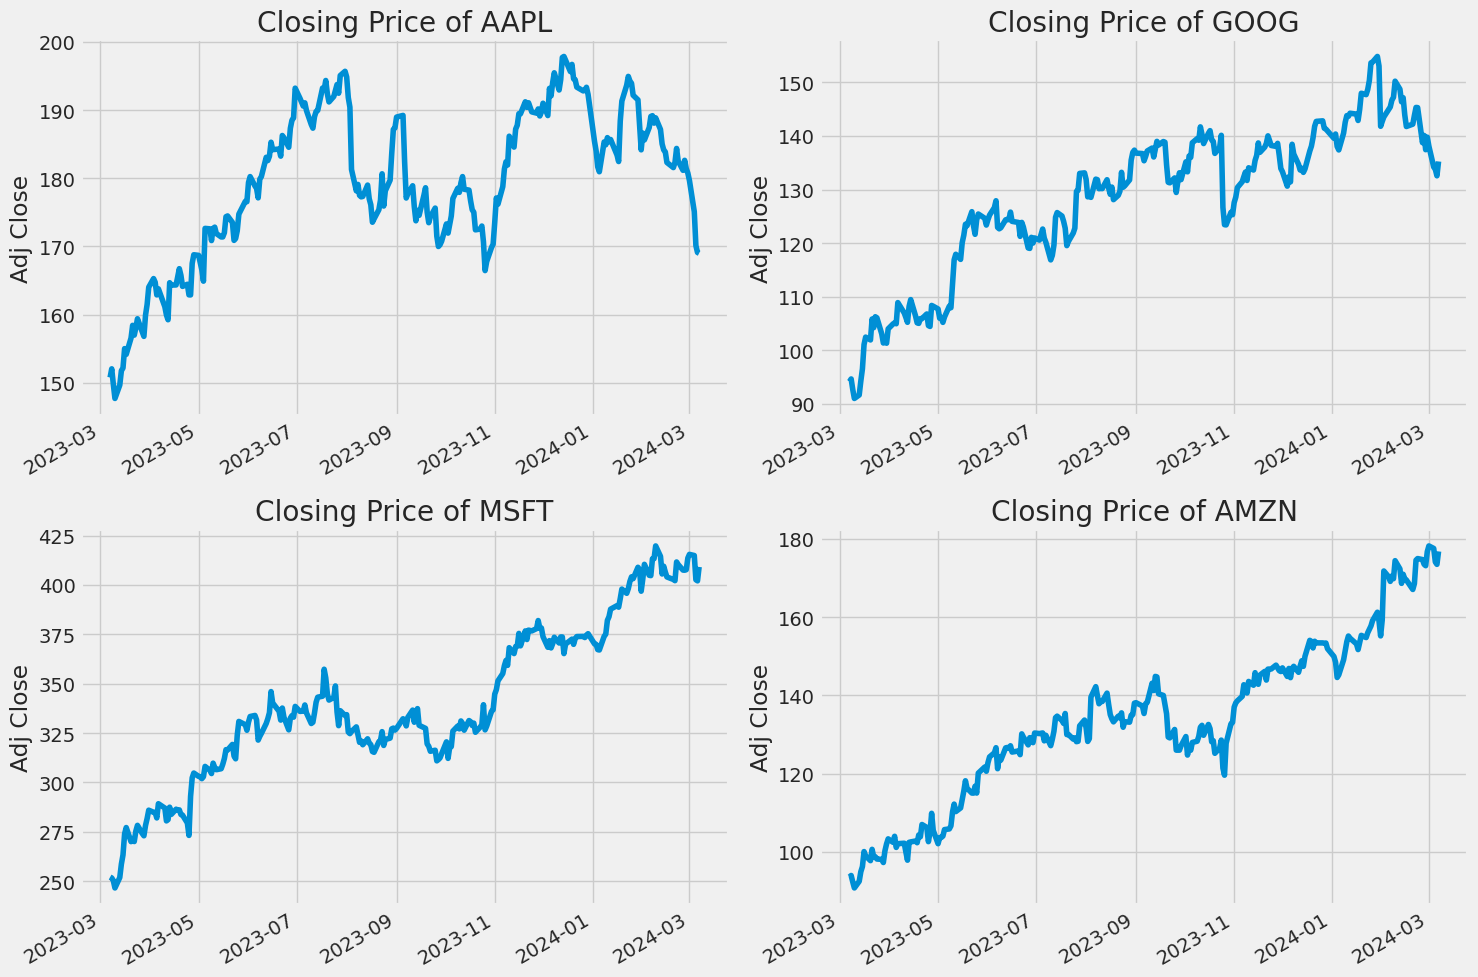

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

Volume refers to the quantity of an asset or security that is exchanged within a specific timeframe, typically during a day. For example, stock trading volume indicates the number of shares of a security traded between its daily opening and closing prices. Both trading volume and its variations over time are crucial factors for technical traders.

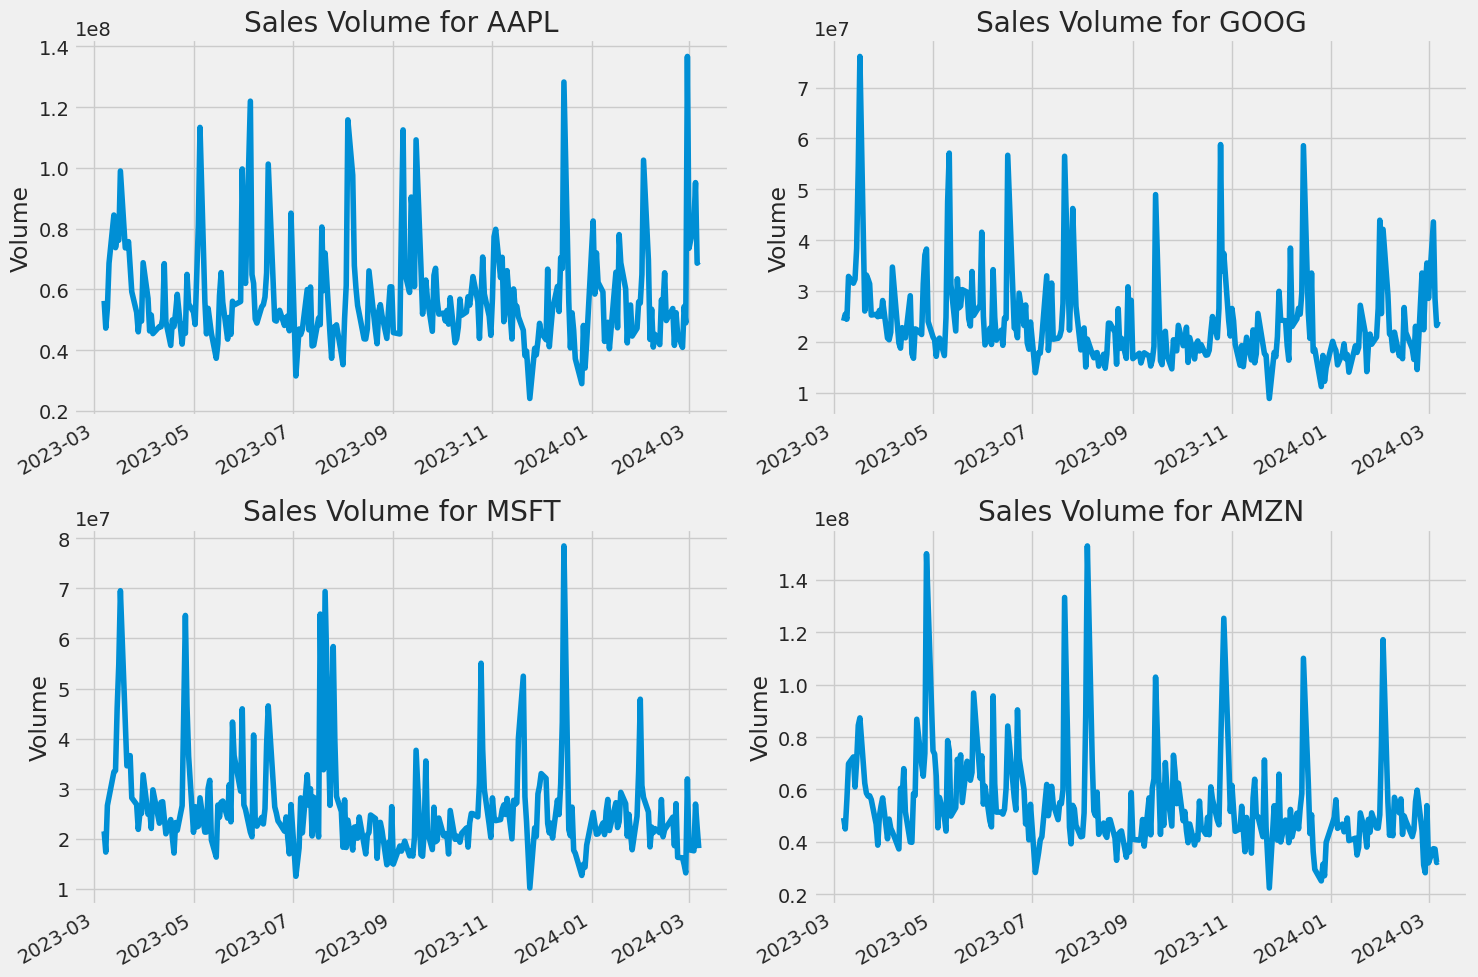

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock. The moving average (MA) is the average prices computed over a designated time frame.

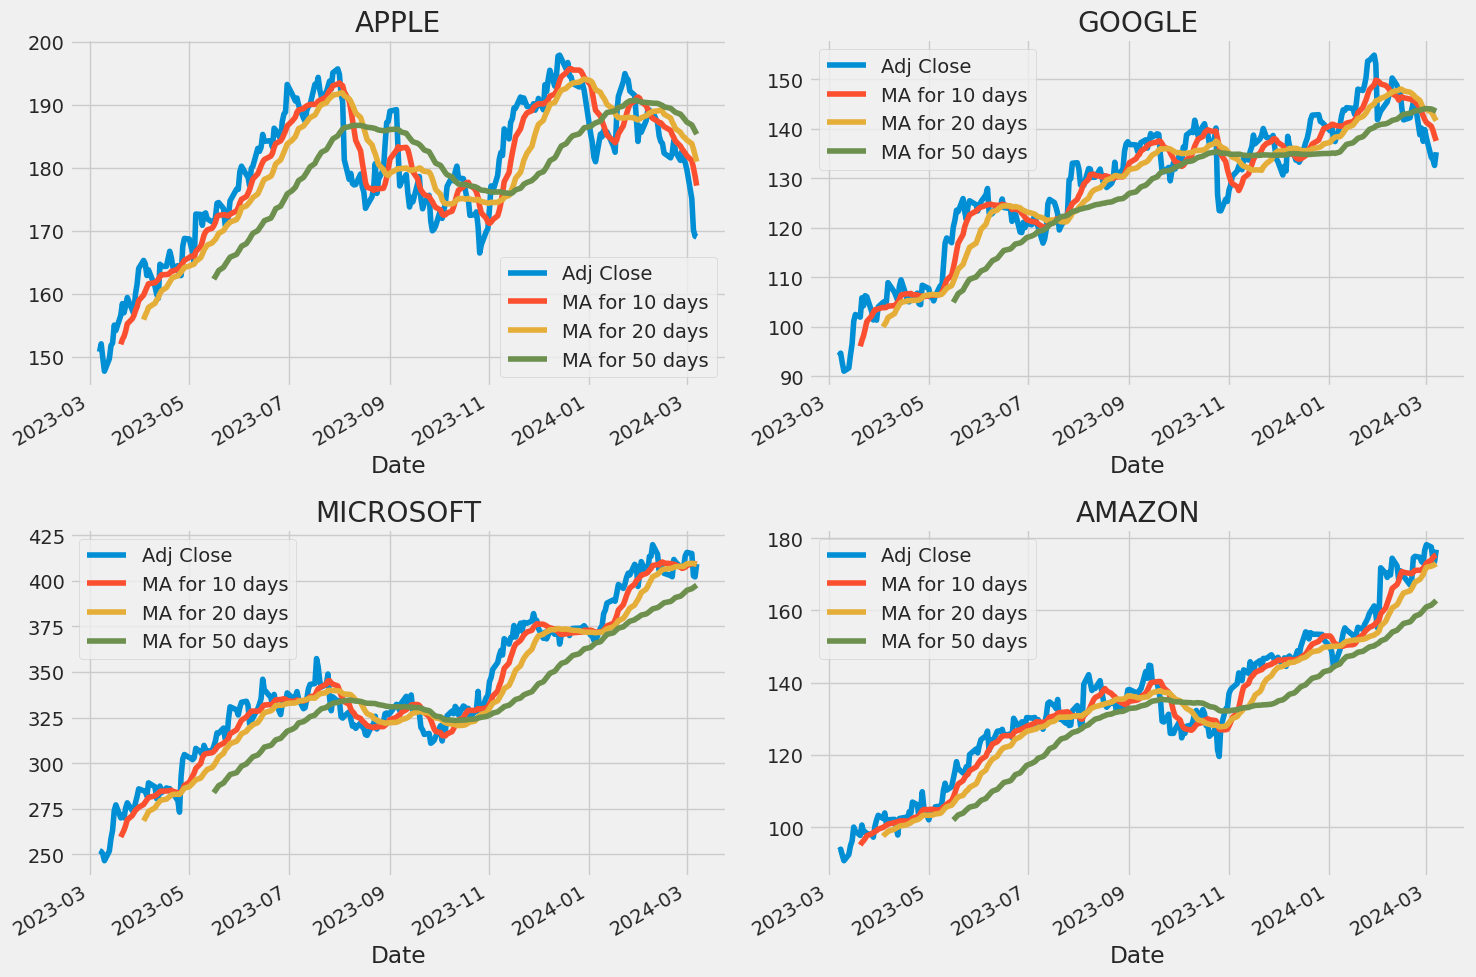

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 2. What was the daily return of the stock on average?

We're now going to analyze the risk of the stock. In order to do so we'll need
to take a closer look at the daily percentage changes in price of the stock. We visualize the average daily return using a histogram.

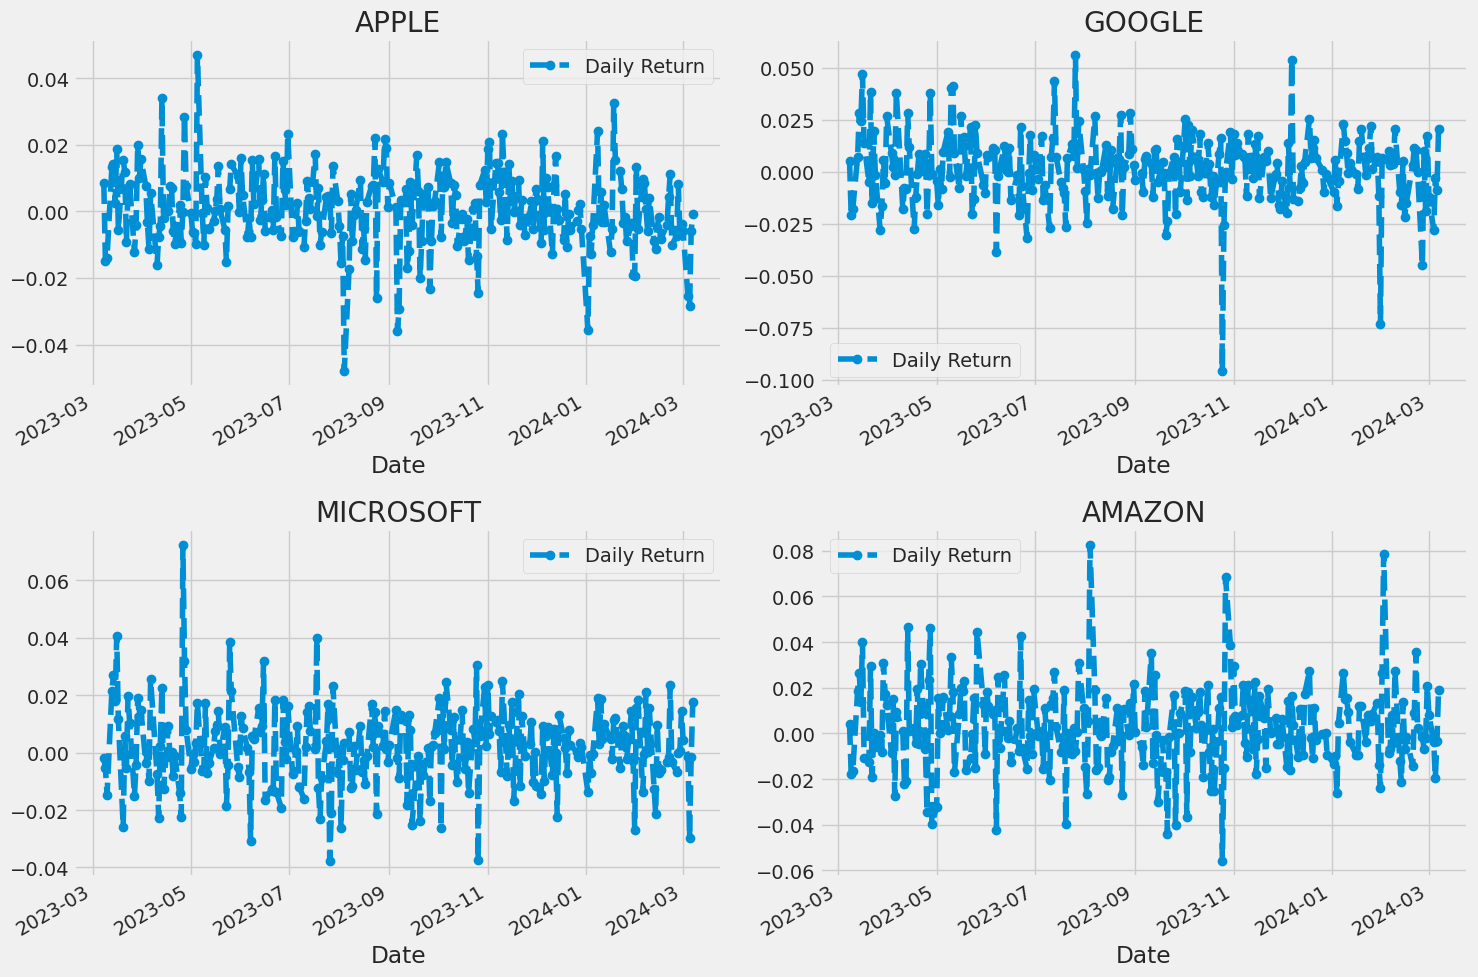

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree at how correlated are two variables which has a value that is between -1.0 and +1.0. Correlation measures association, but doesn’t show the causation effect - it could be that x causes y or vice versa, or if the association is caused by a third factor.

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [4]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-03-07       NaN       NaN       NaN       NaN
2023-03-08  0.008377  0.003955  0.005097 -0.001771
2023-03-09 -0.014915 -0.017781 -0.021025 -0.005439
2023-03-10 -0.013879 -0.016477 -0.017807 -0.014783
2023-03-13  0.013266  0.018737  0.007142  0.021441

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a comparison between the Microsoft and Google stocks.



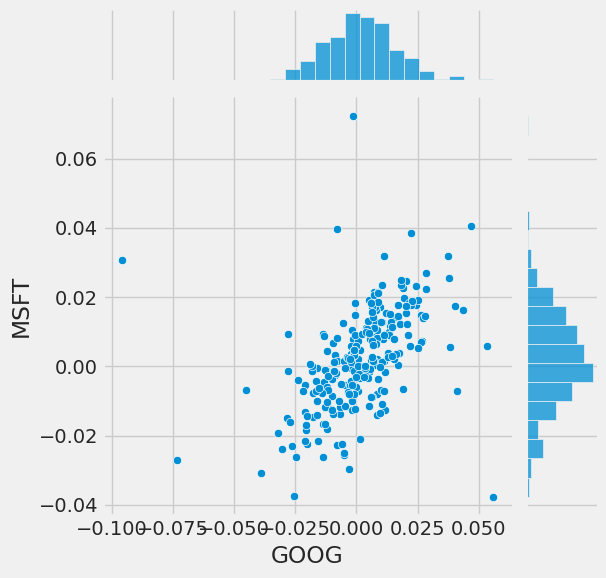

In [9]:
#  Compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can observe that the daily returns of Google are positively correlated with the daily returns of Microsoft. We will now replicate this comparison analysis for every possible combination of stocks and plot all the comparisons on a single graph.

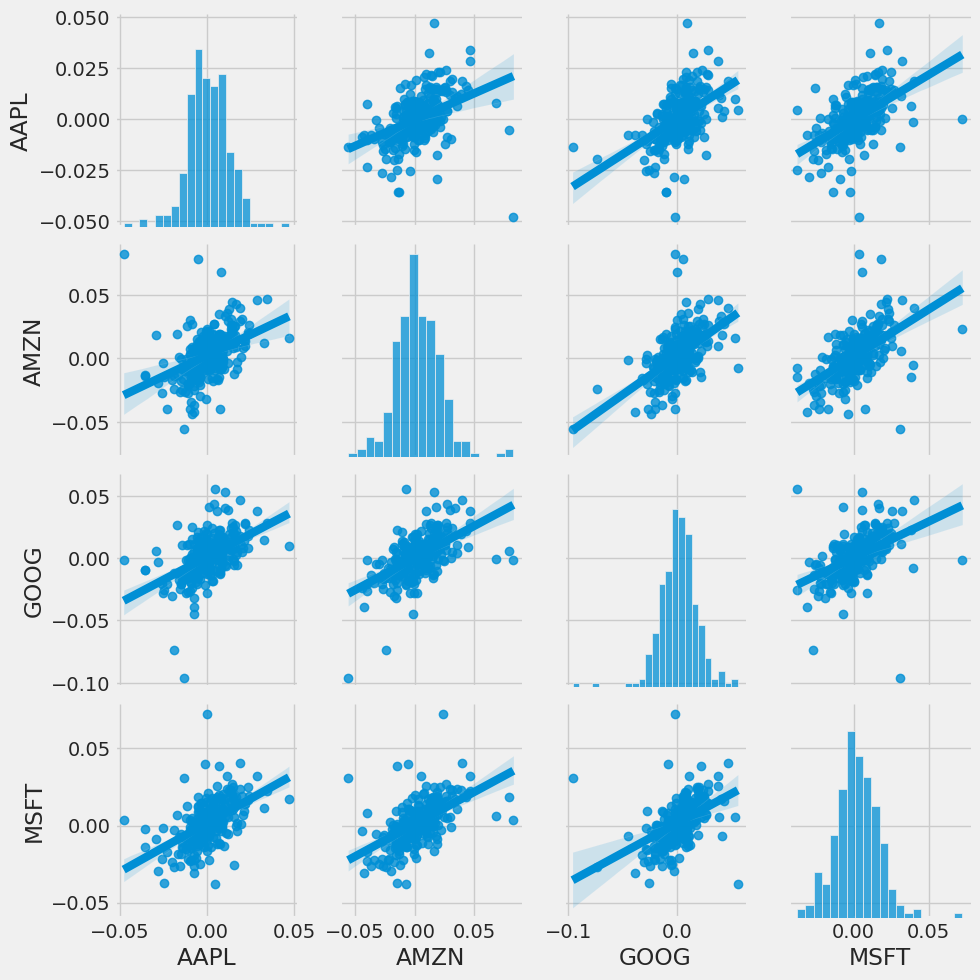

In [10]:
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows a positive correlation between each pair of stocks.

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.


Text(0.5, 1.0, 'Correlation of stock closing price')

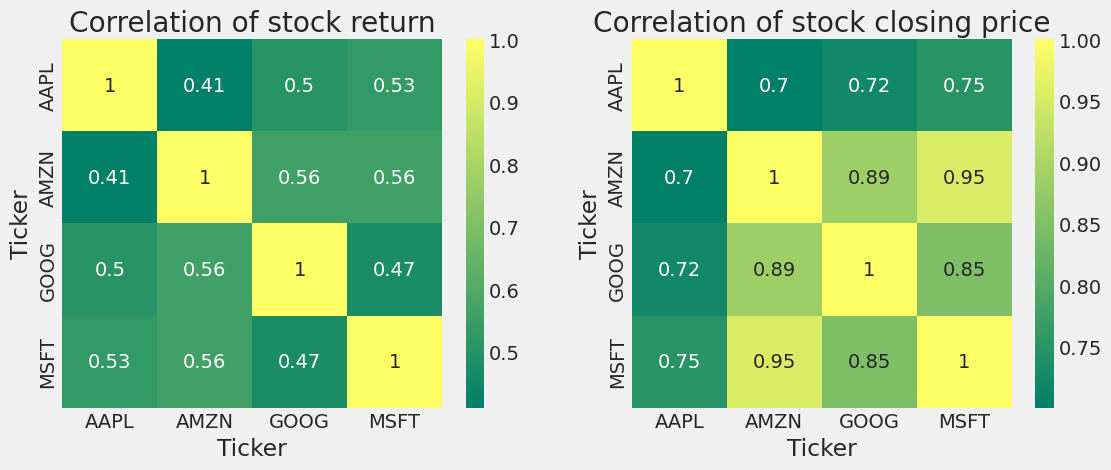

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

We see here numerically and visually that Amazon and Microsoft or Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

# 4. How much risk by investing in a particular stock?

There are various methods to [measure risk](https://www.investopedia.com/ask/answers/041415/what-are-some-common-measures-risk-used-risk-management.asp). One fundamental approach is through the standard deviation of daily returns, which measures the spread of data from its mean. Essentially, a stock with a higher standard deviation signifies greater investment risk, as the returns are more likely to deviate from the average. Here, we plot the average daily returns alongside the standard deviation of daily returns.

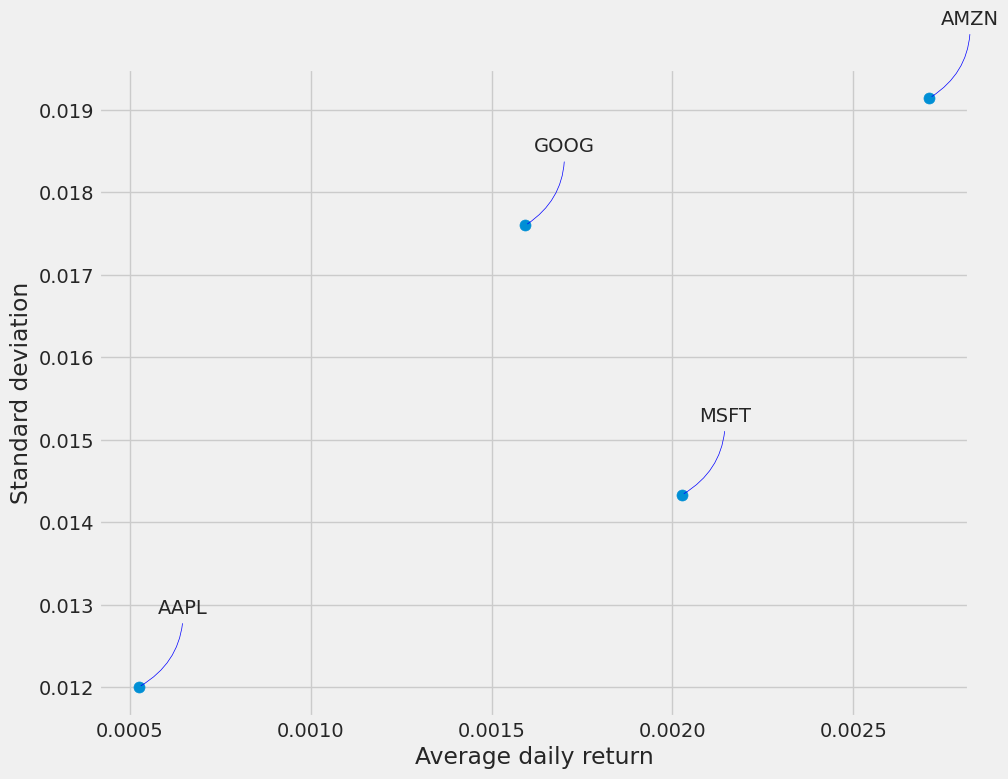

In [12]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Average daily return')
plt.ylabel('Standard deviation')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

We can see that Amazon stock has the highest risk, followed by Google, Microsoft, and Apple. Nevertheless, it is important to acknowledge that stocks with higher risk also tend to have higher average daily returns. One possible way of deciding which stock to invest is by looking at the ratio of average return and standard deviation. One can decide to invest the stock with the larger ratio.

In [13]:
rets.mean()/ rets.std()

Ticker
AAPL    0.043668
AMZN    0.141591
GOOG    0.090502
MSFT    0.141322
dtype: float64

# 5. Predicting the closing stock price of APPLE inc:

Here, our objective is to forecast future stock prices using deep learning techniques. Deep learning methods are typically data-intensive and challenging to interpret. However, they are currently the most widely utilized and accurate methods for prediction tasks. Initially, we gather the closing stock prices of Apple Inc. over the past decade.


In [5]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2013-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-02   19.779285   19.821428   19.343929   19.608213   16.747725   
2013-01-03   19.567142   19.631071   19.321428   19.360714   16.536322   
2013-01-04   19.177500   19.236786   18.779642   18.821428   16.075708   
2013-01-07   18.642857   18.903570   18.400000   18.710714   15.981153   
2013-01-08   18.900356   18.996071   18.616072   18.761070   16.024162   
...                ...         ...         ...         ...         ...   
2024-03-01  179.550003  180.529999  177.380005  179.660004  179.660004   
2024-03-04  176.149994  176.899994  173.789993  175.100006  175.100006   
2024-03-05  170.759995  172.039993  169.619995  170.119995  170.119995   
2024-03-06  171.059998  171.240005  168.679993  169.119995  169.119995   
2024-03-07  169.149994  170.729996  168.490005  169.000000  169.000000   

               Volume  
Date                   
2013-01-02  560518000  
2013-01-03  352965200  
2013-01-04  594333600  
2013-01-07  484156400  
2013-01-08  458707200  
...               ...  
2024-03-01   73488000  
2024-03-04   81510100  
2024-03-05   95132400  
2024-03-06   68587700  
2024-03-07   69861226  

[2814 rows x 6 columns]

In [6]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on, using 90% of the data as a training set
training_data_len = int(np.ceil( len(dataset) * .90 ))
training_data_len

2533

In [7]:
# The first step of training the data is scaling the data to have mean 0 and variance 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0307376 ],
       [0.02939368],
       [0.02646537],
       ...,
       [0.84801463],
       [0.84258464],
       [0.84193307]])

In [8]:
# Create the training data set and the test data set
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[int(training_data_len):len(scaled_data), :]

## Autoregresive model
We first build a autoregression model, which is a standard model in time-series analysis. Mathematically, for every value $y_t$ we want to predict, we use the last L value as predictors:

$$ y_t =
\beta_0 + \beta_1 y_{t - 1} +
\ldots + \beta_L y_{t - L}  
$$
For every time steps $t$. The cofficients can be obtained using least squared estimation. Here, we use the stock values of the last two months for predicting the next value (L = 60).

In [9]:
from statsmodels.tsa.ar_model import AutoReg

auto_reg = AutoReg(train_data, lags=60)
AutoReg_fit = auto_reg.fit()
predictions = AutoReg_fit.predict(start=len(train_data), end=len(scaled_data)-1, dynamic=False)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model

mse = np.mean((dataset[training_data_len: , :] - predictions) ** 2)
print('Mean Squared Error:', mse)

Mean Squared Error: 646.9635887668708


<ipython-input-10-ede314f91477>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


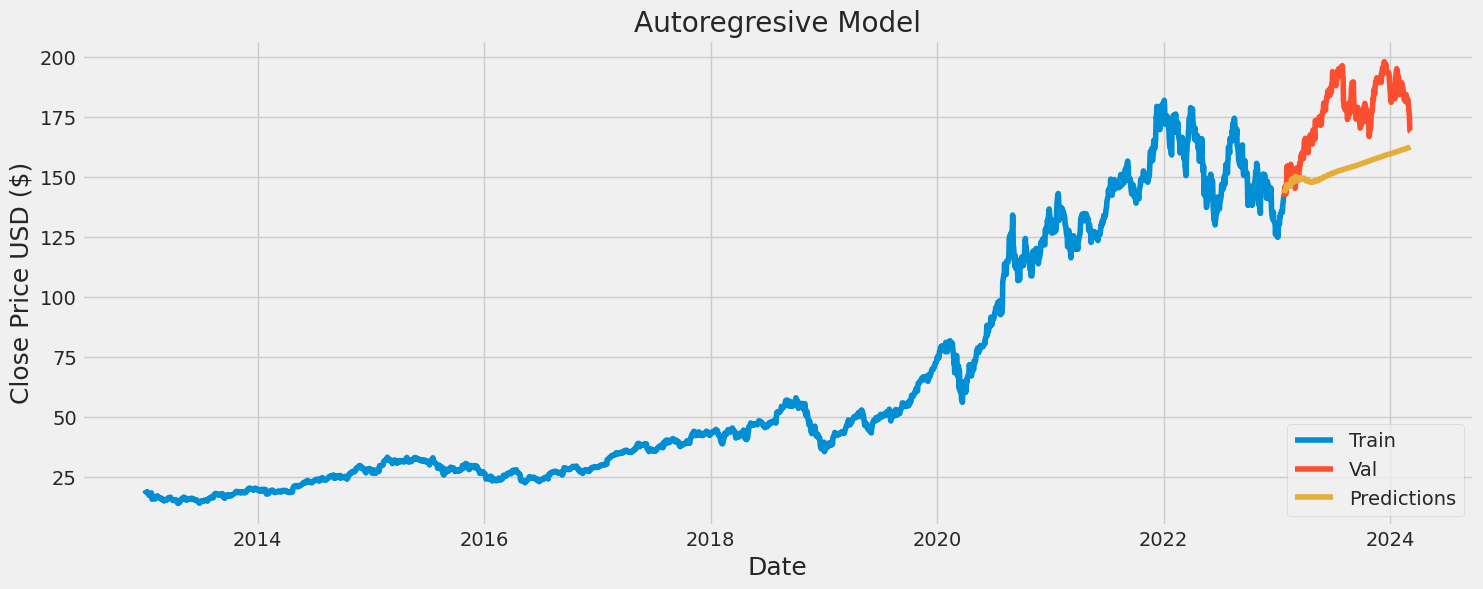

In [10]:
#plot the prediction result
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Autoregresive Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

The autoregressive model fit a linear model, which is not really a good prediction based on the graph. In the next section, we will try to improve the prediction using deep learning methods.

## Deep learning methods
In recent years, deep learning methods have demonstrated remarkable advancements, particularly in fields like image processing. These sophisticated techniques, although known for their resource-intensive nature and complexity in interpretation, have shown unparalleled effectiveness in various prediction tasks across diverse domains. Their ability to analyze complex patterns and relationships within data sets has revolutionized the landscape of predictive modeling, enabling more accurate forecasts and valuable insights in areas ranging from computer vision and natural language processing to financial forecasting and healthcare diagnostics.

 First, we prepare the data by spliting the training data into a chunk of length L: $(y_t, y_{t-1},
\ldots, y_{t - L})$ for every time step $t$. The first value is the label and the rest are used for training.

In [21]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
# Using the past 10 days to predict the next day's value
L = 60

for i in range(L, len(train_data)):
    x_train.append(train_data[i-L:i, 0]) #Each row of x_train is the predictors for each time step t
    y_train.append(train_data[i, 0])


# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [58]:
# \We build the dense Neural network model with 4 layers.
from keras.layers import Dense
from keras.models import Sequential

model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1], ) ))

# Add additional hidden layers with ReLU activation
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=16, activation='relu'))

# Add the output layer with appropriate activation function for your task
model1.add(Dense(units=1, activation='relu'))  # Adjust output_dim and activation as needed


# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(x_train, y_train, batch_size=1, epochs=1)

2473/2473 [==============================] - 6s 2ms/step - loss: 0.0131


In [59]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + L:, :]
for i in range(L, len(test_data)):
    x_test.append(test_data[i-L:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data

# Get the models predicted price values
NN_predictions = model1.predict(x_test)
NN_predictions = scaler.inverse_transform(NN_predictions)

# Get the root mean squared error (RMSE)

mse = np.mean((NN_predictions - y_test) ** 2)
print('Mean Squared Error:', mse)

7/7 [==============================] - 0s 4ms/step
Mean Squared Error: 88.6290912114029


<ipython-input-61-40de40bca64c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = NN_predictions


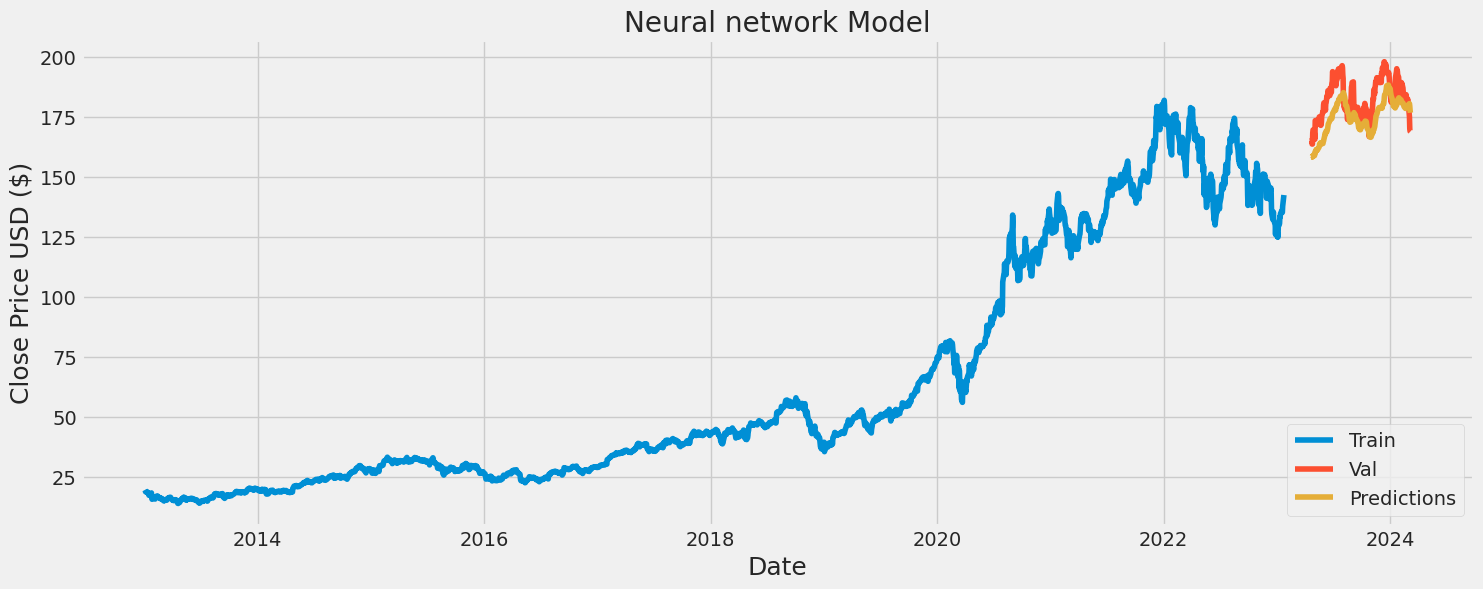

In [61]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len + L:]
valid['Predictions'] = NN_predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Neural network Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

From this, we can see that a simple dense neural network has significant improvement in prediction over the autoregressive model. Next, We will build a more advanced model: [Long short-term memory (LSTM) network](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) to see if there are improvement in performance, which is a special type of recurrence neural network capable of capturing long-term dependence.

In [22]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

# Build the LSTM model with 4 layers: the first two layers are LSTM structure and the last two are dense layers
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model2.fit(x_train, y_train, batch_size=1, epochs=1)

2473/2473 [==============================] - 155s 61ms/step - loss: 0.0011


(It's worth noting the long training time: it takes more than 2 minutes on a relatively small data set)

In [23]:
# Get the models predicted price values
RNN_predictions = model2.predict(x_test)
RNN_predictions = scaler.inverse_transform(RNN_predictions)

# Get the root mean squared error (RMSE)

mse = np.mean((RNN_predictions - y_test) ** 2)
print('Mean Squared Error:', mse)


7/7 [==============================] - 1s 38ms/step
Mean Squared Error: 17.821593280303254


<ipython-input-57-9cf9c17e900c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = RNN_predictions


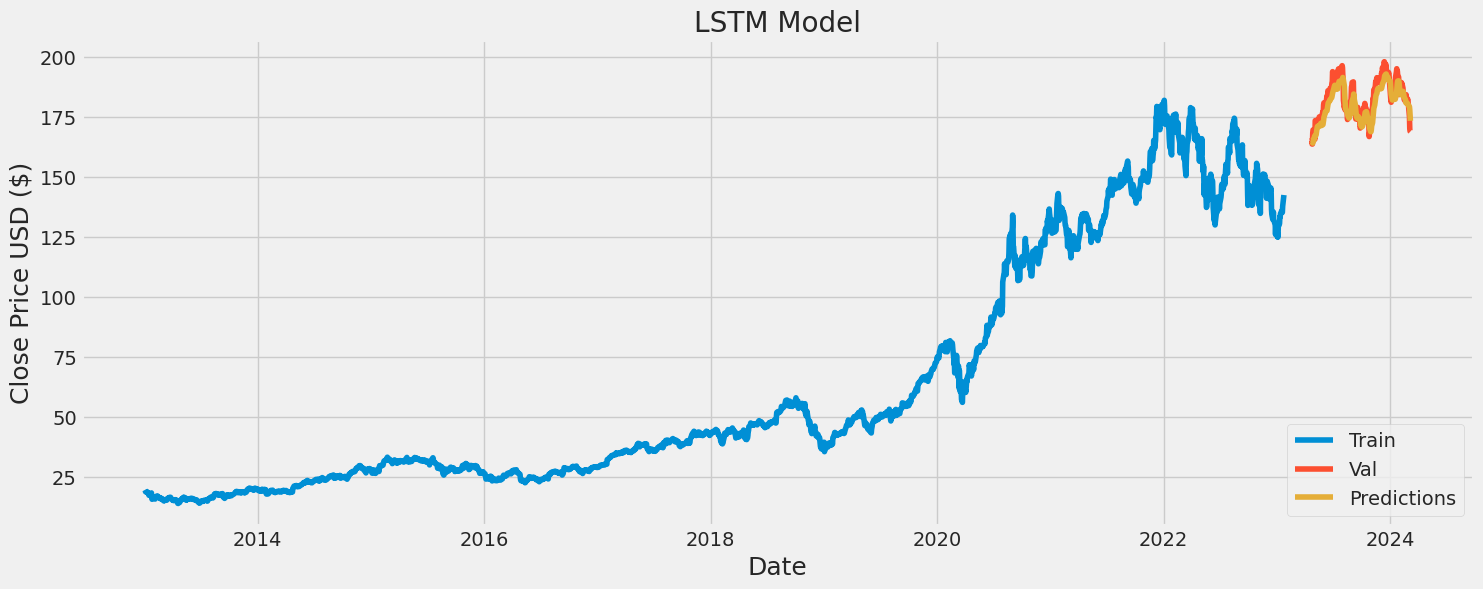

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len + L:]
valid['Predictions'] = RNN_predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

We see that compared to the standard neural network model, LSTM does have significant improvement(in terms of mean squared error).